# DiploDatos 2021


### Categorización de publicaciones de productos realizadas en Mercado Libre

### 01 - Análisis y Visualización

#### Condiciones generales que aplican a todos los prácticos:
   - Las notebooks tienen que ser 100% reproducibles, es decir al ejecutar las celdas tal cuál como se entrega la notebook se deben obtener los mismos resultados sin errores.
   - Código legible, haciendo buen uso de las celdas de la notebook y en lo posible seguir estándares de código para Python (https://www.python.org/dev/peps/pep-0008/).
   - Utilizar celdas tipo "Markdown" para ir guiando el análisis.
   - Limpiar el output de las celdas antes de entregar el notebook (ir a Kernel --> Restart Kernel and Clear All Ouputs).
   - Incluir conclusiones del análisis que se hizo en la sección "Conclusiones". Tratar de aportar valor en esta sección, ser creativo! 

## 1. Consignas

#### Sección A:  Estadísticas básicas & Visualizaciones

Por cada uno de los siguientes puntos realizar un análisis para poder responder el enunciado/pregunta y generar alguna gráfica para visualizar los resultados:

1. Cuántas publicaciones de items hay dentro de cada categoría.
2. Proporción de publicaciones en español y portugues dentro de cada categoría.
3. Proporción de label quality dentro de cada categoría.
4. Relación entre el label quality y el idioma.

#### Sección B: Estadísticas de las publicaciones & Visualizaciones

Por cada uno de los siguientes puntos realizar un análisis para poder responder el enunciado/pregunta y generar alguna gráfica para visualizar los resultados:

1. Cantidad promedio de palabras del título de la publicacion por categoría.
2. Análisis general de stopwords, números, caracteres especiales, etc. Puede ser un recuento promedio por publicación, no es necesario realizar una gráfica en este punto.
3. Palabras más frecuentes dentro de cada categoría (sin incluir stopwords, números, caracteres especiales, etc).

Tener en cuenta librerías como *NLTK* y *spaCy* para el procesamiento de texto.

## 2. Código y análisis

Imports necesarios

In [62]:
import pandas as pd
import seaborn as sns
import numpy as np

Lectura de dataset reducido

In [63]:
df_dataset = pd.read_csv('dataset.csv')
#df_dataset

In [64]:
#1 - Contamos cantidad item hay por categoria

category_count = df_dataset.category.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'category', 'category': 'count'})
category_count

,category,count
0,PANTS,35973
1,COFFEE_MAKERS,35104
2,BABY_CAR_SEATS,34163
3,MUSICAL_KEYBOARDS,33222
4,MATTRESSES,32967
5,PUREBRED_DOGS,32928
6,RANGES,32645
7,REFRIGERATORS,32635
8,MOTORCYCLE_JACKETS,32615
9,HAIR_CLIPPERS,32372


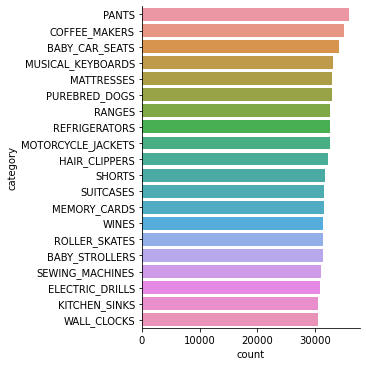

In [65]:
#Mostramos en catplot la cantidad de item por cateogria
sns.catplot(x='count', y='category' ,data=category_count, kind='bar')

In [66]:
#2 Proporción de publicaciones en español y portugues dentro de cada categoría.
category_lenguage_count = df_dataset.groupby(["category","language"], as_index=False).count()
category_lenguage_count = category_lenguage_count.drop(['label_quality'], axis=1)
category_lenguage_count = category_lenguage_count.rename(columns = {'title': 'frecuency'}, inplace = False)
category_lenguage_percent = pd.merge(category_lenguage_count,category_count, on='category')
category_lenguage_percent['PorcentajeLenguaje'] = (category_lenguage_percent['frecuency'] * 100)/category_lenguage_percent['count']
category_lenguage_percent = category_lenguage_percent.drop(['frecuency','count'], axis=1)
#category_lenguage_percent

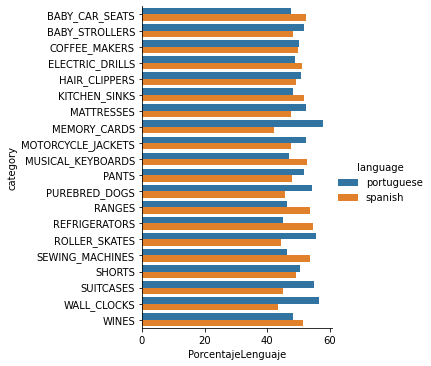

In [67]:
#Mostramos en catplot la Proporción de publicaciones en español y portugues dentro de cada categoría
sns.catplot(x='PorcentajeLenguaje', y='category',hue ='language' , data=category_lenguage_percent, kind='bar')

In [68]:
# 3 Proporción de label quality dentro de cada categoría.
category_lebel_count = df_dataset.groupby(["category","label_quality"], as_index=False).count()
category_lebel_count = category_lebel_count.drop(['language'], axis=1)
category_lebel_count = category_lebel_count.rename(columns = {'title': 'frecuency'}, inplace = False)
category_lebel_percent = pd.merge(category_lebel_count,category_count, on='category')
category_lebel_percent['PercentjeLabel'] = (category_lebel_percent['frecuency'] * 100)/category_lebel_percent['count']
category_lebel_percent = category_lebel_percent.drop(['frecuency','count'], axis=1)
#category_lebel_percent

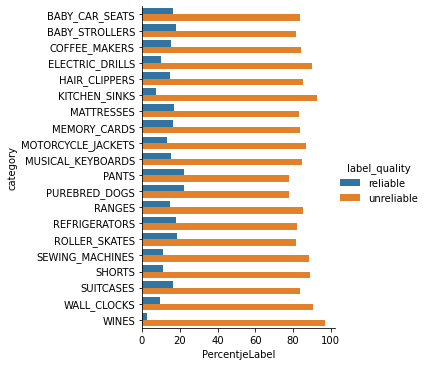

In [69]:
#Mostramos en catplot la Proporción de publicaciones en español y portugues dentro de cada categoría
sns.catplot(x='PercentjeLabel', y='category',hue ='label_quality' , data=category_lebel_percent, kind='bar')

In [73]:
category_lenguage_count = df_dataset.groupby(["category","language","label_quality"], as_index=False).count()

category_lenguage_count = category_lenguage_count.rename(columns = {'title': 'frecuency'}, inplace = False)
relation = pd.merge(category_lenguage_count,category_count, on='category')
relation['PercentLanguage'] = (relation['frecuency'] * 100)/relation['count']
relation = relation.drop(['frecuency','count'], axis=1)
#relation

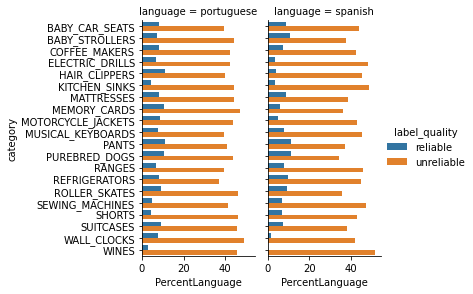

In [71]:
g = sns.catplot(x="PercentLanguage", y="category",
                hue="label_quality", col="language",
                data=relation, kind="bar",
                height=4, aspect=.7);

## 3. Conclusiones

In [72]:
# TO DO